# Exercise: Linear Regression

A) Use the advertising dataset, and fit a linear regression model that estimates the Sales from the TV advertising only (single feature). Find the P-value of the TV feature and the 95% confidence interval of the corresponding coefficients.
Does the confidence interval include the value of Zero? What does that imply?

In [3]:
from pandas import read_csv
import statsmodels.formula.api as smf
AdvertisingData=read_csv('Advertising.csv')
model=smf.ols('Sales ~ TV', AdvertisingData)
Fitting_results=model.fit()
print(Fitting_results.summary().tables[1])
print('p-values are: \n', Fitting_results.pvalues)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
p-values are: 
 Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = AdvertisingData[[ 'TV']].values
Y = AdvertisingData.Sales
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

linreg= LinearRegression().fit(X_train, Y_train)
print("The intercept is: ", linreg.intercept_)
print("The coefficient of TV feature is:",linreg.coef_)

The intercept is:  7.24890928301
The coefficient of TV feature is: [ 0.04614341]


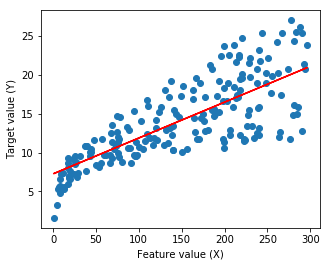

In [18]:
import matplotlib.pyplot as plt
estimated_linearmodel= linreg.intercept_ + linreg.coef_ * X
plt.figure(figsize=(5,4))
plt.scatter(X, Y, marker= 'o') #plot data points
plt.plot(X, estimated_linearmodel, 'r-')
plt.xlabel('Feature value (X)'); plt.ylabel('Target value (Y)')
plt.show()

B) Use the same 'Advertising' data set, and fit linear regression model that predicts Sales from TV, Radio, and Newspaper advertising using Sklearn linear_model module. What is the coefficients of the three features, and what is the MSE of the fitted model. 

Use random_state = 0 in train_test_split


C) Repeat B when TV and Radio are used, but newspaper is not used in the model. What is the MSE in this case. 

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

AdvertisingData=read_csv('Advertising.csv')
X = AdvertisingData[['Radio', 'TV','Newspaper']].values
Y = AdvertisingData.Sales
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

linreg= LinearRegression().fit(X_train, Y_train)
print("The intercept is: ", linreg.intercept_)
print("The coefficient of TV feature is:",linreg.coef_)


The intercept is:  2.89257005115
The coefficient of TV feature is: [ 0.19900368  0.04416235  0.00116268]


In [13]:
from sklearn.metrics import mean_squared_error
Target_predicted= linreg.predict(X_test)
MSE=mean_squared_error(Y_test,Target_predicted)
print('mean square error', MSE)

mean square error 4.01249752292


#C

In [14]:
X = AdvertisingData[['Radio', 'TV']].values
Y = AdvertisingData.Sales
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

linreg= LinearRegression().fit(X_train, Y_train)
print("The intercept is: ", linreg.intercept_)
print("The coefficient of TV feature is:",linreg.coef_)

The intercept is:  2.9109237322
The coefficient of TV feature is: [ 0.19946953  0.04419729]


In [15]:
from sklearn.metrics import mean_squared_error
Target_predicted= linreg.predict(X_test)
MSE=mean_squared_error(Y_test,Target_predicted)
print('mean square error', MSE)

mean square error 3.99985266758
